# The Ultimate Guide to Amazon Baby Fashion: Insights and Ratings

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Baby Fashion.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            2208 non-null   object
 1   main_category   2208 non-null   object
 2   sub_category    2208 non-null   object
 3   image           2208 non-null   object
 4   link            2208 non-null   object
 5   ratings         1262 non-null   object
 6   no_of_ratings   1262 non-null   object
 7   discount_price  2032 non-null   object
 8   actual_price    2152 non-null   object
dtypes: object(9)
memory usage: 155.4+ KB


In [5]:
# Drop 'image' and 'link' columns
df = df.drop(['image', 'link'], axis=1)

# Optional: Confirm the columns are removed
print(df.columns)


Index(['name', 'main_category', 'sub_category', 'ratings', 'no_of_ratings',
       'discount_price', 'actual_price'],
      dtype='object')


In [6]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,EIO New Born Baby Gift Set -13 Piecess (Pink),kids' fashion,Baby Fashion,4.2,"2,958",₹649,"₹1,499"
1,exciting Lives - Vintage Motorbike Pocket Watc...,kids' fashion,Baby Fashion,4.2,161,₹485,₹699
2,Jewel string by Bk arts Evil Eye Baby Nazaria ...,kids' fashion,Baby Fashion,4.2,962,₹249,₹799
3,Superminis Unisex-baby's Bootie,kids' fashion,Baby Fashion,4.1,"2,046",₹350,₹899
4,My Newborn Baby Mittens Caps Gloves and Booty ...,kids' fashion,Baby Fashion,3.8,"5,601",₹299,₹900


## Exploratory Data Analysis (EDA) 
##### Check the data structure

##### Handle missing values

##### Clean price & rating columns

##### Summarize categorical variables

##### Visualize insights

In [7]:
# Data overview
print(df.info())

# Preview
print(df.head())

# Missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            2208 non-null   object
 1   main_category   2208 non-null   object
 2   sub_category    2208 non-null   object
 3   ratings         1262 non-null   object
 4   no_of_ratings   1262 non-null   object
 5   discount_price  2032 non-null   object
 6   actual_price    2152 non-null   object
dtypes: object(7)
memory usage: 120.9+ KB
None
                                                name  main_category  \
0      EIO New Born Baby Gift Set -13 Piecess (Pink)  kids' fashion   
1  exciting Lives - Vintage Motorbike Pocket Watc...  kids' fashion   
2  Jewel string by Bk arts Evil Eye Baby Nazaria ...  kids' fashion   
3                    Superminis Unisex-baby's Bootie  kids' fashion   
4  My Newborn Baby Mittens Caps Gloves and Booty ...  kids' fashion   

   sub_category ratings 

## 2. Clean Columns (Ratings, Prices)

In [9]:
# First, inspect some unique entries
print(df['no_of_ratings'].unique()[:20])  # or use .sample(20)

# Keep only rows where 'no_of_ratings' looks like a number
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '', regex=True)

# Remove anything that's not digits using regex
df['no_of_ratings'] = df['no_of_ratings'].str.extract(r'(\d+)', expand=False)

# Convert to float
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')


['2,958' '161' '962' '2,046' '5,601' '264' '4,050' '2' nan '5,914' '768'
 '2,439' '13' '7,280' '940' '39' '5,883' '805' '83' '482']


In [14]:
# Step 1: Convert to string (this avoids the .str error)
df['no_of_ratings'] = df['no_of_ratings'].astype(str)

# Step 2: Remove commas
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '', regex=True)

# Step 3: Extract only digits from string (ignore things like 'FREE Delivery')
df['no_of_ratings'] = df['no_of_ratings'].str.extract(r'(\d+)', expand=False)

# Step 4: Convert to float (non-numeric results will become NaN)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')


In [16]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,EIO New Born Baby Gift Set -13 Piecess (Pink),kids' fashion,Baby Fashion,4.2,2958.0,649.0,1499.0
1,exciting Lives - Vintage Motorbike Pocket Watc...,kids' fashion,Baby Fashion,4.2,161.0,485.0,699.0
2,Jewel string by Bk arts Evil Eye Baby Nazaria ...,kids' fashion,Baby Fashion,4.2,962.0,249.0,799.0
3,Superminis Unisex-baby's Bootie,kids' fashion,Baby Fashion,4.1,2046.0,350.0,899.0
4,My Newborn Baby Mittens Caps Gloves and Booty ...,kids' fashion,Baby Fashion,3.8,5601.0,299.0,900.0


##  3. Missing Data Handling

In [17]:
# Check again after cleaning
print(df.isnull().sum())

# Optionally fill or drop missing rows
df = df.dropna(subset=['discount_price', 'actual_price'])  # keep only those with price info


name                0
main_category       0
sub_category        0
ratings           952
no_of_ratings     948
discount_price    176
actual_price       56
dtype: int64


In [18]:
print(df.isnull().sum())

name                0
main_category       0
sub_category        0
ratings           825
no_of_ratings     821
discount_price      0
actual_price        0
dtype: int64


In [21]:
df_rated = df.dropna(subset=['ratings', 'no_of_ratings'])


## Feature Engineering

In [23]:
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100


In [24]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,discount_percent
0,EIO New Born Baby Gift Set -13 Piecess (Pink),kids' fashion,Baby Fashion,4.2,2958.0,649.0,1499.0,56.704470
1,exciting Lives - Vintage Motorbike Pocket Watc...,kids' fashion,Baby Fashion,4.2,161.0,485.0,699.0,30.615165
2,Jewel string by Bk arts Evil Eye Baby Nazaria ...,kids' fashion,Baby Fashion,4.2,962.0,249.0,799.0,68.836045
3,Superminis Unisex-baby's Bootie,kids' fashion,Baby Fashion,4.1,2046.0,350.0,899.0,61.067853
4,My Newborn Baby Mittens Caps Gloves and Booty ...,kids' fashion,Baby Fashion,3.8,5601.0,299.0,900.0,66.777778


In [25]:
df_rated['weighted_score'] = df_rated['ratings'] * df_rated['no_of_ratings']


C:\Users\RAMEEN SHAHID\AppData\Local\Temp\ipykernel_300\17296607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated['weighted_score'] = df_rated['ratings'] * df_rated['no_of_ratings']


In [26]:
def price_bucket(price):
    if price < 250:
        return 'Low'
    elif price < 500:
        return 'Medium'
    elif price < 1000:
        return 'High'
    else:
        return 'Premium'

df['price_range'] = df['discount_price'].apply(price_bucket)


In [27]:
def rating_category(r):
    if pd.isna(r):
        return 'Unrated'
    elif r >= 4.5:
        return 'Excellent'
    elif r >= 4.0:
        return 'Good'
    elif r >= 3.5:
        return 'Average'
    else:
        return 'Poor'

df['rating_category'] = df['ratings'].apply(rating_category)


In [28]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,discount_percent,price_range,rating_category
0,EIO New Born Baby Gift Set -13 Piecess (Pink),kids' fashion,Baby Fashion,4.2,2958.0,649.0,1499.0,56.704470,High,Good
1,exciting Lives - Vintage Motorbike Pocket Watc...,kids' fashion,Baby Fashion,4.2,161.0,485.0,699.0,30.615165,Medium,Good
2,Jewel string by Bk arts Evil Eye Baby Nazaria ...,kids' fashion,Baby Fashion,4.2,962.0,249.0,799.0,68.836045,Low,Good
3,Superminis Unisex-baby's Bootie,kids' fashion,Baby Fashion,4.1,2046.0,350.0,899.0,61.067853,Medium,Good
4,My Newborn Baby Mittens Caps Gloves and Booty ...,kids' fashion,Baby Fashion,3.8,5601.0,299.0,900.0,66.777778,Medium,Average


In [29]:
# Define thresholds (e.g., 1.5 times the IQR for discount prices)
Q1 = df['discount_price'].quantile(0.25)
Q3 = df['discount_price'].quantile(0.75)
IQR = Q3 - Q1

df['is_discount_outlier'] = (df['discount_price'] < (Q1 - 1.5 * IQR)) | (df['discount_price'] > (Q3 + 1.5 * IQR))

# For ratings, you can use similar logic
Q1_ratings = df['ratings'].quantile(0.25)
Q3_ratings = df['ratings'].quantile(0.75)
IQR_ratings = Q3_ratings - Q1_ratings

df['is_rating_outlier'] = (df['ratings'] < (Q1_ratings - 1.5 * IQR_ratings)) | (df['ratings'] > (Q3_ratings + 1.5 * IQR_ratings))


In [31]:
df['std_ratings'] = df['ratings'].std()


## Business Analysis Features to Add

In [32]:
df['estimated_sales_volume'] = df['no_of_ratings'] * df['ratings']  # Assuming ratings influence sales


In [33]:
df['revenue_from_discounts'] = df['discount_price'] * df['no_of_ratings'].astype(float)


In [35]:
df['customer_engagement'] = df['no_of_ratings'].astype(float) * df['ratings']


In [36]:
df['is_discounted'] = df['discount_price'] < df['actual_price']
discounted_count = df['is_discounted'].sum()
total_count = len(df)
df['discount_impact'] = discounted_count / total_count * 100  # Percentage of products discounted


In [37]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,discount_percent,price_range,rating_category,is_discount_outlier,is_rating_outlier,std_ratings,estimated_sales_volume,revenue_from_discounts,customer_engagement,is_discounted,discount_impact
0,EIO New Born Baby Gift Set -13 Piecess (Pink),kids' fashion,Baby Fashion,4.2,2958.0,649.0,1499.0,56.704470,High,Good,False,False,0.800178,12423.6,1919742.0,12423.6,True,100.0
1,exciting Lives - Vintage Motorbike Pocket Watc...,kids' fashion,Baby Fashion,4.2,161.0,485.0,699.0,30.615165,Medium,Good,False,False,0.800178,676.2,78085.0,676.2,True,100.0
2,Jewel string by Bk arts Evil Eye Baby Nazaria ...,kids' fashion,Baby Fashion,4.2,962.0,249.0,799.0,68.836045,Low,Good,False,False,0.800178,4040.4,239538.0,4040.4,True,100.0
3,Superminis Unisex-baby's Bootie,kids' fashion,Baby Fashion,4.1,2046.0,350.0,899.0,61.067853,Medium,Good,False,False,0.800178,8388.6,716100.0,8388.6,True,100.0
4,My Newborn Baby Mittens Caps Gloves and Booty ...,kids' fashion,Baby Fashion,3.8,5601.0,299.0,900.0,66.777778,Medium,Average,False,False,0.800178,21283.8,1674699.0,21283.8,True,100.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2032 entries, 0 to 2207
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    2032 non-null   object 
 1   main_category           2032 non-null   object 
 2   sub_category            2032 non-null   object 
 3   ratings                 1207 non-null   float64
 4   no_of_ratings           1211 non-null   float64
 5   discount_price          2032 non-null   float64
 6   actual_price            2032 non-null   float64
 7   discount_percent        2032 non-null   float64
 8   price_range             2032 non-null   object 
 9   rating_category         2032 non-null   object 
 10  is_discount_outlier     2032 non-null   bool   
 11  is_rating_outlier       2032 non-null   bool   
 12  std_ratings             2032 non-null   float64
 13  estimated_sales_volume  1207 non-null   float64
 14  revenue_from_discounts  1211 non-null   float

## Visualizations

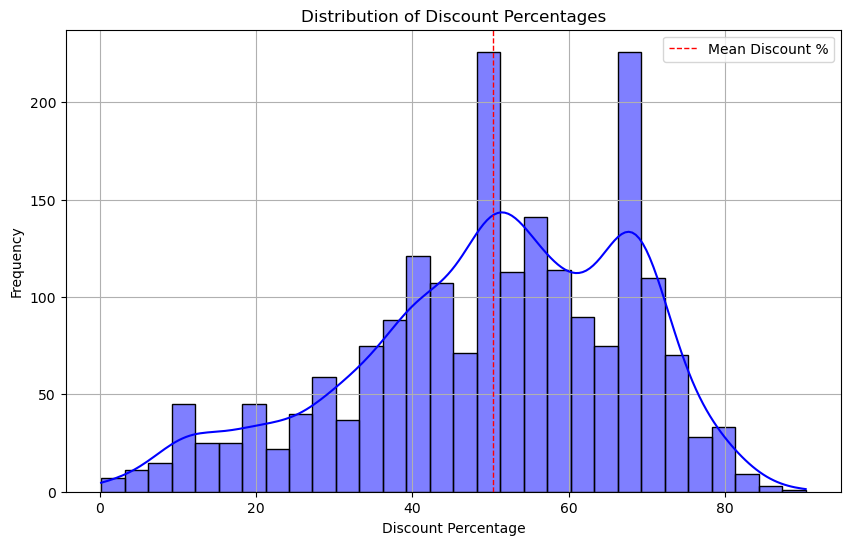

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percent'], bins=30, kde=True, color='blue')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.axvline(df['discount_percent'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Discount %')
plt.legend()
plt.grid()
plt.show()


C:\Users\RAMEEN SHAHID\AppData\Local\Temp\ipykernel_300\2932512526.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings_subcategory.index, y=avg_ratings_subcategory.values, palette='viridis')


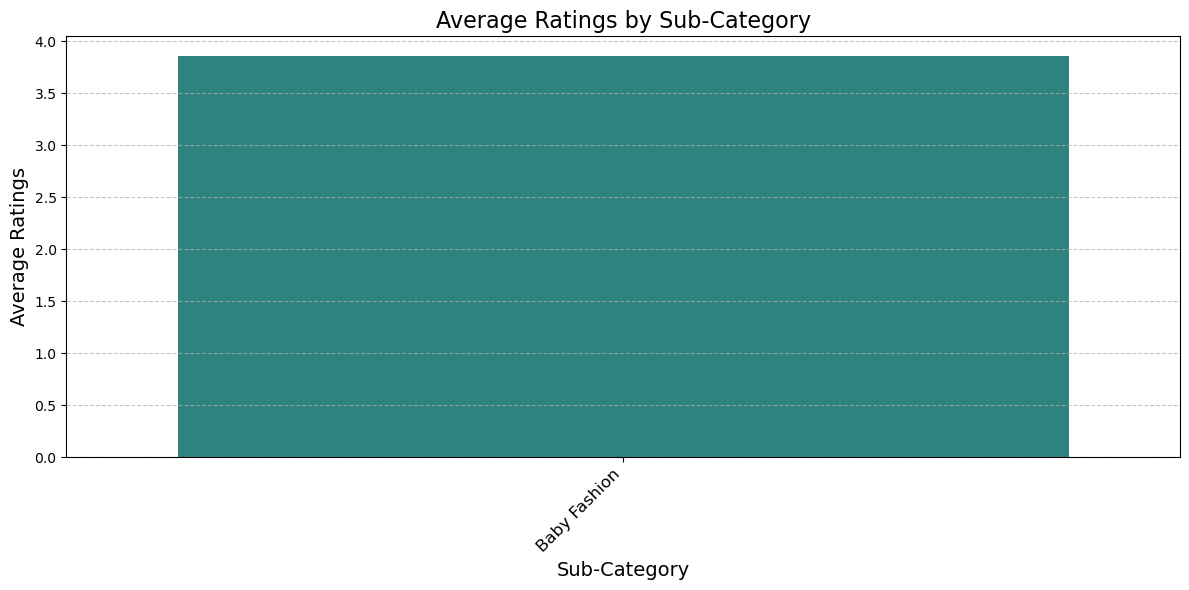

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and calculating average ratings
avg_ratings_subcategory = df.groupby('sub_category')['ratings'].mean().dropna().sort_values()

# Setting the size of the plot
plt.figure(figsize=(12, 6))

# Creating the bar plot
sns.barplot(x=avg_ratings_subcategory.index, y=avg_ratings_subcategory.values, palette='viridis')

# Adding titles and labels
plt.title('Average Ratings by Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Average Ratings', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.tight_layout()
plt.show()


In [43]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_baby_fashion_dataset.csv', index=False)
